## Error & Exception

相信大家學到這邊一定有碰過各式大大小小的程式錯誤

如何捕捉異常和異常處理是本節的小重點！！

大致可以將錯誤分類成三種：

- 語法錯誤：開發者不小心多一個括弧等等
- 邏輯錯誤：可以執行成功但不是我們要的，例如銀行存款金額是負數
- 執行異常：在程式執行階段所引發的錯誤

### 1. try except

發生了 ZeroDivisionError

In [13]:
def division(n1, n2):
    return  n1/n2

In [14]:
division(1, 0)

ZeroDivisionError: division by zero

通常應該會做一些輸入資料的檢查來避免這種錯誤

但假設在爬網站，可能有各式各樣的錯誤會發生

今天發現一個錯誤就要改一次程式碼，明天發現錯誤又要改

那這支程式可能永遠難以上線

為了避免這樣的窘境，我們可以加上例外處理，讓程式去捕捉我們沒有想過的異常

另外也可以思考一個情境是提供程式給使用者，使用者可能會輸入你沒有想過的情境

如果因為他的輸入導致你的程式異常，那使用者體驗會很差，

In [15]:
def division(n1, n2):
    try:
        return  n1/n2
    except ZeroDivisionError:
        print("除數不可以為0")

In [16]:
division(1, 0)

除數不可以為0


有個調皮鬼輸入文字，那怎麼辦？

又發生錯誤了ＱＱ

In [17]:
division('1', '0')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [18]:
def division(n1, n2):
    try:
        return  n1/n2
    except ZeroDivisionError:
        print("除數不可以為0")
    except TypeError:
        print("請輸入數字")
    except Exception as e
        print("錯誤資訊:", e)

In [19]:
division('1', '0')

請輸入數字


#### 講師提醒

盡量將能捕捉的錯誤枚舉，讓每個錯誤都有不同的資訊或不同的處理才是好寫法

最後想不到的錯誤才放到 Exception

```python=
try:
    # 嘗試執行的程式碼
except:
    # 當程式出現異常時執行的程式碼
```

### 2. try except else finally

剛剛上面介紹還並非完全型態呢XD

```python=
try:
    # 嘗試執行的程式碼
except:
    # 當程式出現異常時執行的程式碼
else:
    # 錯誤沒有發生就會執行的程式碼
finally:
    # 無論如何都要執行的程式碼
```

In [29]:
def read_txt(file_path):
    try:
        with open(file_path) as file:
            data = file.read()
    except FileNotFoundError:
        print("路徑異常:", file_path)
    else:
        print("成功了！")
    finally:
        print("感謝您使用本程式！")

In [30]:
read_txt("/Users/erik/GitHub/Data-Science/06_Python_Advanced_Skills/hello_world.txt")

成功了！
感謝您使用本程式！


In [31]:
read_txt("/Users/erik/GitHub/Data-Science/06_Python_Advanced_Skills/hello_world_no.txt")

路徑異常: /Users/erik/GitHub/Data-Science/06_Python_Advanced_Skills/hello_world_no.txt
感謝您使用本程式！


### 3. 常見的例外錯誤

以下是常見的例外錯誤，大家可以自行參考

最後一個 Exception 代表通用型

| Type     |  Name    |  
| -------- | -------- | 
| Attribute           |  沒有這個屬性        | 
| FileNotFoundError   |  找不到檔案          |
| IOError             |  輸入輸出的錯誤      |  
| IndexError          |  索引超出範圍        | 
| KeyError            |  沒有該鍵           |
| MemoryError         |  記憶體超出範圍      |  
| NameError           |  未宣告該變數        |
| SyntaxError         |  語法錯誤           |
| SystemError         |  系統錯誤           | 
| TypeError           |  資料類別錯誤        | 
| ValueError          |  傳入無效參數        | 
| ZeroDivisionError   |  除數為 0           |
| Exception           |  可以代替錯誤的關鍵字 |


### 4. 丟出異常

有時候是我們想要檢驗邏輯是否錯誤，如果錯誤，就請程式停止不要再繼續執行

此時該怎麼做呢？

In [35]:
def input_phone(number: str):
    if len(number) != 10:
        raise Exception('您的手機號碼長度不正確')
    print('DONE')

In [36]:
input_phone('0912345678')

DONE


In [37]:
input_phone('09123456789')

Exception: 您的手機號碼長度不正確

### 5. 定義錯誤

若想要自己寫例外的話，我們必須繼承 Exception 物件。

若想讓定義的物件像一般常見到的例外物件一樣，能夠直接透過物件實體來輸出的話，須在物件中加入 \___str\___ 的物件方法。

In [22]:
class PasswordInputError(Exception):
    
    def __init__(self, password):
        self.password = password
        
    def __str__(self):
        return '錯誤訊息:' + self.password

#### 講師提醒
print(e) 會調用 \__str\__ 的魔法方法，重寫 Exception 原本寫的方法

In [23]:
password = input("請設定密碼")
try:
    if len(password) < 5:
        raise PasswordInputError(password)
except Exception as e:
    print(e)

請設定密碼 1


錯誤訊息:1


### 6. 斷言

assert 是 raise 的一種特殊形式
```python=
assert 運算式, 參數
```
如果運算式是 False，並且內建的 \__debug\__為 True，則引發帶有參數的 AssertError

通常用於檢查異常、寫測試案例等等

In [26]:
save_money = input('請輸入存款金額')
assert int(save_money) > 0 , '請輸入大於零的數字'

請輸入存款金額 -5


AssertionError: 請輸入大於零的數字

#### 講師提醒
內建的 \__debug\__ 預設值為 True ，若要改變的話，在啟動 python 加上 -O 或 -OO

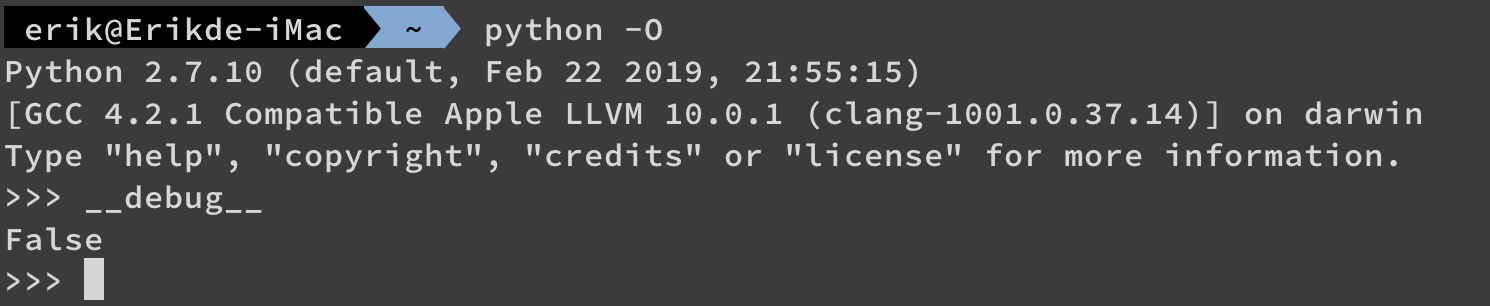

### 課堂練習
設計一個帳號密碼輸入驗證的類別，帳號密碼皆為文字型

帳號必須至少2個字、密碼最短5個字最長12個字

程式碼需明確定義兩個錯誤
- 類別錯誤(TypeError)
- 定義的例外處理

### 7. 程式日誌

## Decorator